## Problem 2 [Testing Faith Again]
Apply your GMM-EM algorithm to fit the “old faithful” data set to a GMM pdf.
Plot a contour plot of your final GMM pdf. Overlay the contour plot with a scatterplot of the data set. How would you use the GMM pdf estimates to cluster the data?

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import  numpy as np
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import matplotlib as mpl
# import the data from data.txt.
data = pd.read_csv("data.txt", delim_whitespace=True, skipinitialspace=True)
xy = np.array([data['eruptions'],data['waiting']]).T

In [2]:
def my_em_2d2pgmm(xy):
    # Initialize the parameters.
    model = KMeans(n_clusters=2)
    model.fit(xy)
    mean1_t = model.cluster_centers_[0]
    mean2_t = model.cluster_centers_[1]
    cov1_t = np.ma.cov(xy.T)
    cov2_t = cov1_t
    p_t = np.random.rand()
    
    # EM interation
    MAXITERATION = 1000
    tol = 0.001
    theta = np.r_[p_t, mean1_t, mean2_t, cov1_t.reshape(-1),cov2_t.reshape(-1)]
    iternum = 1
    p_t_record = [p_t]
    mean1_t_record = [mean1_t]
    mean2_t_record = [mean2_t]
    cov1_t_record = [cov1_t]
    cov2_t_record = [cov2_t]
    for i in range(MAXITERATION):
            # E-Step:
        w = np.array([p_t*multivariate_normal.pdf(xy, mean = mean1_t, cov = cov1_t),
                    (1-p_t)*multivariate_normal.pdf(xy, mean = mean2_t, cov = cov2_t)])
        w = w/sum(w,0)
            # M-Step:
        nml = sum(w.T)
        p_t = nml[0]/len(xy)
        mean1_t = np.r_[sum(w[0,:]*xy[:,0]), sum(w[0,:]*xy[:,1])]
        mean1_t = mean1_t/nml[0]
        mean2_t = np.r_[sum(w[1,:]*xy[:,0]), sum(w[1,:]*xy[:,1])]
        mean2_t = mean2_t/nml[1]
        c1 = np.array([w[0],w[0]]).T*(xy-mean1_t)
        c2 = np.array([w[1],w[1]]).T*(xy-mean2_t)
        cov1_t = np.dot(c1.T,xy-mean1_t)/nml[0]
        cov2_t = np.dot(c2.T,xy-mean2_t)/nml[1]
        theta_t = np.r_[p_t, mean1_t, mean2_t, cov1_t.reshape(-1),cov2_t.reshape(-1)]
        diff = sum(abs(theta_t - theta))
        theta = theta_t
        p_t_record.append(p_t)
        mean1_t_record.append(mean1_t)
        mean2_t_record.append(mean2_t)
        cov1_t_record.append(cov1_t)
        cov2_t_record.append(cov2_t)
        if diff < tol:
            iternum = i+1
            break

    return iternum, p_t, mean1_t, mean2_t, cov1_t, cov2_t

In [3]:
iternum, p_t, mean1_t, mean2_t, cov1_t, cov2_t=my_em_2d2pgmm(xy)

Let's plot the contour plot.

<IPython.core.display.Javascript object>


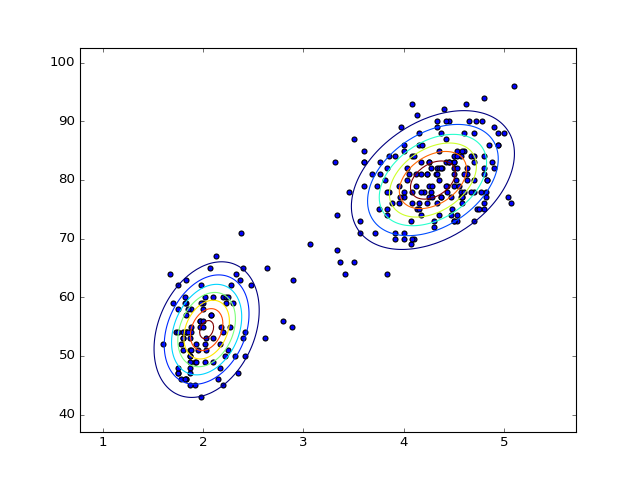

In [17]:
x = np.arange(1,5.5, 0.01)
y = np.arange(40,100,0.5)
X, Y = np.meshgrid(x, y)
Z1 = multivariate_normal.pdf(np.array([X,Y]).T, mean = mean1_t, cov = cov1_t).T
Z2 = multivariate_normal.pdf(np.array([X,Y]).T, mean = mean2_t, cov = cov2_t).T
plt.figure()
plt.scatter(xy[:,0],xy[:,1])
plt.contour(X, Y, Z1)
plt.hold
plt.contour(X, Y, Z2)
plt.show()

The point will be classified to the cluster whose pdf function gets higher value. If those values are the same, just choose one randomly.

<IPython.core.display.Javascript object>


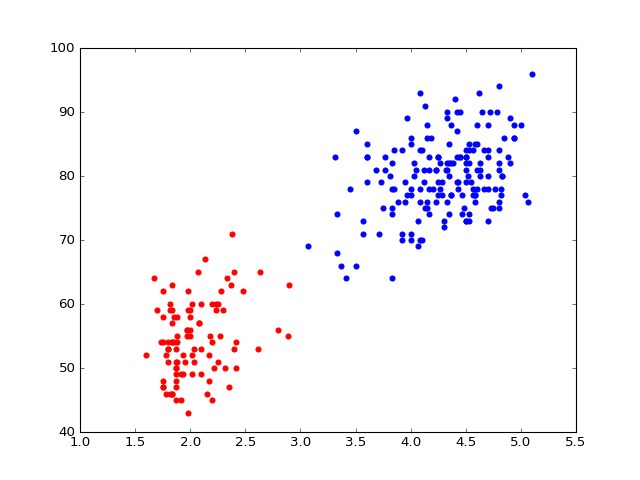

In [38]:
class_index =  multivariate_normal.pdf(xy, mean = mean1_t, cov = cov1_t) > multivariate_normal.pdf(xy, mean = mean2_t, cov = cov2_t)
xy1 = xy[class_index]
xy2 = xy[class_index==False]
plt.figure()
plt.scatter(xy1[:,0],xy1[:,1],color = 'red')
plt.hold
plt.scatter(xy2[:,0],xy2[:,1],color = 'blue')
plt.show()